# f(K) score

See *Selection of K in K-means clustering*, D. T. Pham, S. S. Dimov, and C. D. Nguyen DOI: 10.1243/095440605X8298
See also https://datasciencelab.wordpress.com/2014/01/21/selection-of-k-in-k-means-clustering-reloaded/.

In [1]:
import numpy as np
import scipy as sp
import sys
import sklearn, sklearn.cluster, sklearn.metrics, sklearn.datasets
import matplotlib.pyplot as plt
import random
import seaborn as sns
from matplotlib.ticker import MaxNLocator

%matplotlib inline
%load_ext autoreload

In [2]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import myvalidation
%autoreload 2

In [4]:
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1,1), random.uniform(-1,1))
        s = random.uniform(0.05,0.15)
        x = []
        while len(x) < n:
            a,b = np.array([np.random.normal(c[0],s),np.random.normal(c[1],s)])
            if abs(a) and abs(b)<1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

## Gaussian blobs - 1

In [3]:
np.random.seed(0)
random.seed(0)

In [5]:
data = init_board_gauss(300,2)

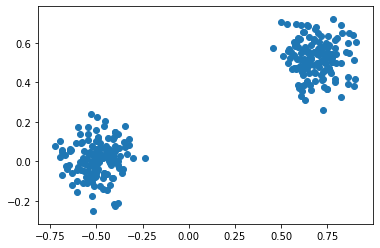

In [6]:
x = data[:,0]
y = data[:,1]
plt.scatter(x,y)

### Run KMeans

**settings**

In [7]:
KRange = range(2,10)
niter = 300
nrun = 5
conv=1e-5
metric = 'euclidean'

In [8]:
center = np.mean(data,axis=0)
center

array([0.09557987, 0.26708558])

In [9]:
wss_1 = np.sum(sp.spatial.distance.cdist(data,np.expand_dims(center,axis=0))**2)
wss_1

129.32981809421858

In [10]:
Clusters = list()
for k in KRange:
    my_estimator = myclusters.KMeans(K=k,niter=niter,nrun=nrun,boot='kmeans++',conv=1e-5,metric=metric)
    my_estimator.do_clustering(X=data)
    clusters = np.copy(my_estimator.clusters)
    Clusters.append((k,my_estimator.inertia,clusters))

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [11]:
SSE1 = list()
sk = wss_1
for C in Clusters:    
    myeval = myvalidation.cluster_eval(clusters=C[2],X=data,metric=metric)
    CH,wss = myeval(method="CH")
    sil = sklearn.metrics.silhouette_score(data,C[2],metric=metric)
    CHs = sklearn.metrics.calinski_harabasz_score(data,C[2])
    calc_sk = lambda k,sk: 1. if k==1 else sk
    fk,sk = myeval(method="f_K",Skm1=calc_sk(k,sk))
    SSE1.append([C[0],C[1],sil,fk,CH,CHs])

**compare with scikit**
does not hurt

In [12]:
Clusters = list()
for k in KRange:
    estimator = sklearn.cluster.KMeans(n_clusters=k,init='k-means++',n_init=nrun,max_iter=niter, tol=conv)
    estimator.fit_predict(data)
    clusters = np.copy(estimator.labels_)
    Clusters.append((k,estimator.inertia_,clusters))

In [13]:
SSE2 = list()
sk = wss_1
for C in Clusters:    
    myeval = myvalidation.cluster_eval(clusters=C[2],X=data,metric=metric)
    CH,wss = myeval(method="CH")
    sil = sklearn.metrics.silhouette_score(data,C[2],metric=metric)
    CHs = sklearn.metrics.calinski_harabasz_score(data,C[2])
    calc_sk = lambda k,sk: 1. if k==1 else sk
    fk,sk = myeval(method="f_K",Skm1=calc_sk(C[0],sk))
    SSE2.append([C[0],C[1],sil,fk,CH,CHs])  

In [14]:
SSE1 = np.asarray(SSE1)
SSE2 = np.asarray(SSE2)

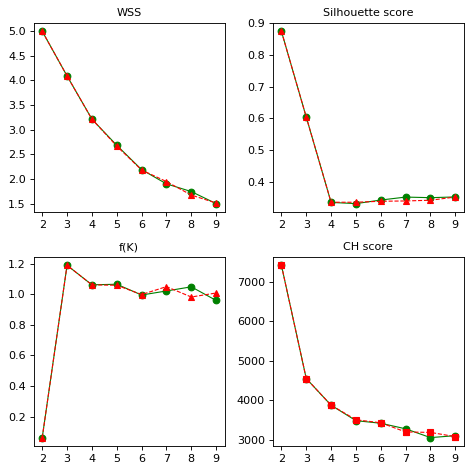

In [15]:
fig = plt.figure(figsize=(6,6), dpi= 80, facecolor='w', edgecolor='k')
titles  = ('WSS','Silhouette score','f(K)','CH score')
col_row = (221,222,223,224)

for i,I in enumerate(col_row):
    ax = plt.subplot(I)
    plt.title(titles[i], fontsize=10)
    j=i+1
    if j==4:
        plt.plot(SSE1[:,0],SSE1[:,j],'go-',linewidth=1)
        plt.plot(SSE2[:,0],SSE2[:,j],'r^--',linewidth=1)
        plt.plot(SSE1[:,0],SSE1[:,j+1],'g+',linewidth=1)
        plt.plot(SSE2[:,0],SSE2[:,j+1],'rs',linewidth=1)
    else:
        plt.plot(SSE1[:,0],SSE1[:,j],'go-',linewidth=1)
        plt.plot(SSE2[:,0],SSE2[:,j],'r^--',linewidth=1)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))    

fig.tight_layout()

## Gaussian blobs - 2

In [16]:
np.random.seed(0)
random.seed(0)

In [17]:
data = init_board_gauss(500,5)

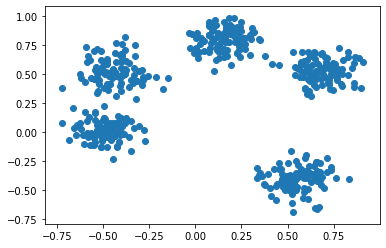

In [18]:
x = data[:,0]
y = data[:,1]
plt.scatter(x,y)

### Run KMeans

**settings**

In [20]:
center = np.mean(data,axis=0)
center

array([0.09475797, 0.29164282])

In [21]:
wss_1 = np.sum(sp.spatial.distance.cdist(data,np.expand_dims(center,axis=0))**2)
wss_1

221.6542241465358

In [22]:
Clusters = list()
for k in KRange:
    my_estimator = myclusters.KMeans(K=k,niter=niter,nrun=nrun,boot='kmeans++',conv=1e-5,metric=metric)
    my_estimator.do_clustering(X=data)
    clusters = np.copy(my_estimator.clusters)
    Clusters.append((k,my_estimator.inertia,clusters))

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [23]:
SSE1 = list()
sk = wss_1
for C in Clusters:    
    myeval = myvalidation.cluster_eval(clusters=C[2],X=data,metric=metric)
    CH,wss = myeval(method="CH")
    sil = sklearn.metrics.silhouette_score(data,C[2],metric=metric)
    CHs = sklearn.metrics.calinski_harabasz_score(data,C[2])
    calc_sk = lambda k,sk: 1. if k==1 else sk
    fk,sk = myeval(method="f_K",Skm1=calc_sk(k,sk))
    SSE1.append([C[0],C[1],sil,fk,CH,CHs])

**compare with scikit**
does not hurt

In [24]:
Clusters = list()
for k in KRange:
    estimator = sklearn.cluster.KMeans(n_clusters=k,init='k-means++',n_init=nrun,max_iter=niter, tol=conv)
    estimator.fit_predict(data)
    clusters = np.copy(estimator.labels_)
    Clusters.append((k,estimator.inertia_,clusters))

In [25]:
SSE2 = list()
sk = wss_1
for C in Clusters:    
    myeval = myvalidation.cluster_eval(clusters=C[2],X=data,metric=metric)
    CH,wss = myeval(method="CH")
    sil = sklearn.metrics.silhouette_score(data,C[2],metric=metric)
    CHs = sklearn.metrics.calinski_harabasz_score(data,C[2])
    calc_sk = lambda k,sk: 1. if k==1 else sk
    fk,sk = myeval(method="f_K",Skm1=calc_sk(C[0],sk))
    SSE2.append([C[0],C[1],sil,fk,CH,CHs])  

In [26]:
SSE1 = np.asarray(SSE1)
SSE2 = np.asarray(SSE2)

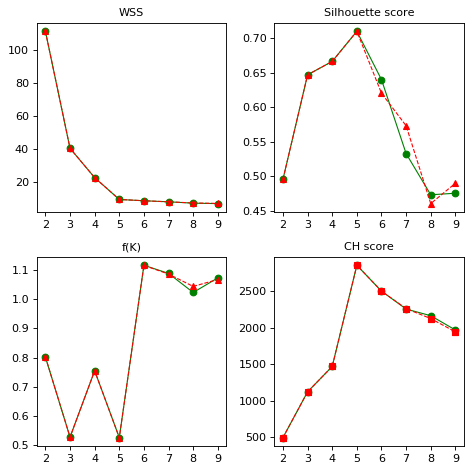

In [27]:
fig = plt.figure(figsize=(6,6), dpi= 80, facecolor='w', edgecolor='k')
titles  = ('WSS','Silhouette score','f(K)','CH score')
col_row = (221,222,223,224)

for i,I in enumerate(col_row):
    ax = plt.subplot(I)
    plt.title(titles[i], fontsize=10)
    j=i+1
    if j==4:
        plt.plot(SSE1[:,0],SSE1[:,j],'go-',linewidth=1)
        plt.plot(SSE2[:,0],SSE2[:,j],'r^--',linewidth=1)
        plt.plot(SSE1[:,0],SSE1[:,j+1],'g+',linewidth=1)
        plt.plot(SSE2[:,0],SSE2[:,j+1],'rs',linewidth=1)
    else:
        plt.plot(SSE1[:,0],SSE1[:,j],'go-',linewidth=1)
        plt.plot(SSE2[:,0],SSE2[:,j],'r^--',linewidth=1)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))    

fig.tight_layout()

In [30]:
SSE2[:,3]

array([0.8018565 , 0.52643258, 0.75454439, 0.52487013, 1.11634136,
       1.08659464, 1.04413474, 1.0678943 ])